<center><h1>IHX</h1></center> 
<center><h1>Task-2 : Polynomial Regression</h1></center> 

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import random
import statsmodels.api as sm

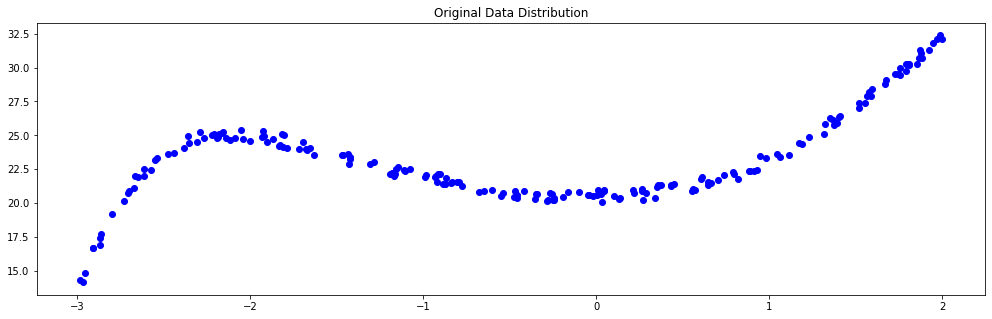

In [2]:
# Create a polynomial data distribution
x = 5*np.random.rand(200,1)-3

# y = ß1 x^1 + ß2 x^2 + bias term
y = (0.2 * x) +( 1.95 * x **2 )+ (0.5 * x **3) + (0.2 * x**4) - (0.025 * x**5) - (0.045 * x**6) + (20 + np.random.rand(200,1))

plt.figure(figsize=(17,5))
plt.plot(x,y,'bo')
plt.title('Original Data Distribution')
plt.show()

R2 Score: 0.26
RMSE: 2.92


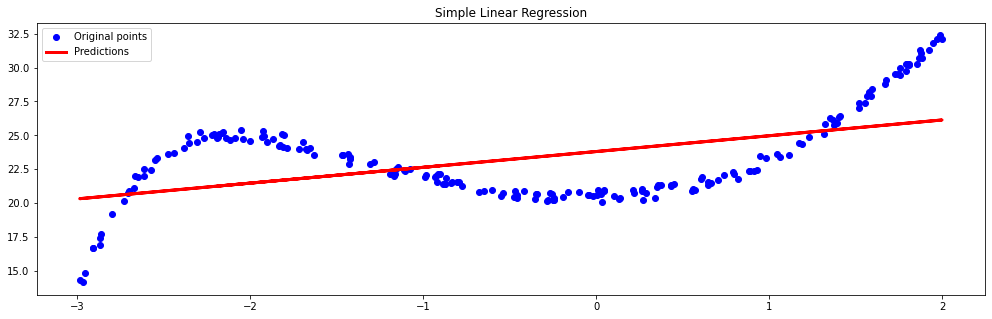

In [29]:
plt.figure(figsize=(17,5))
slr = LinearRegression()
slr.fit(x,y)
y_pred_lr = slr.predict(x)

plt.plot(x,y,'bo', label='Original points')
plt.plot(x,y_pred_lr,'red', linewidth=3, label="Predictions")
plt.title('Simple Linear Regression')

print('R2 Score: {:.2f}'.format(r2_score(y,y_pred_lr)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y,y_pred_lr))))

plt.legend()
plt.show()

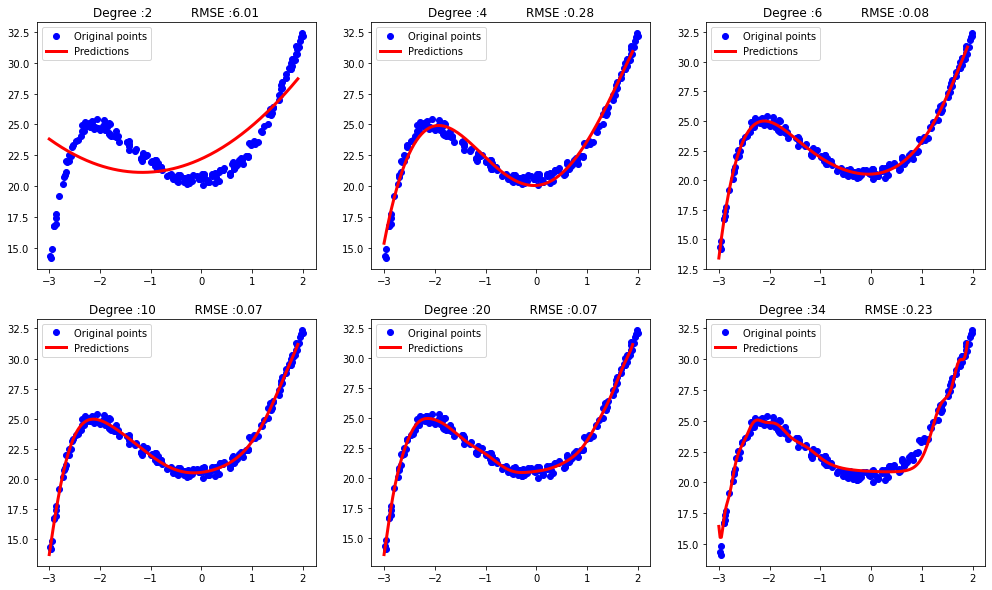

In [30]:
# With bias term included
plt.figure(figsize=(17,10))
degrees = [2,4,6,10,20,34]
for i in range(len(degrees)):
    poly = PolynomialFeatures(degree=degrees[i])

    x_trans = poly.fit_transform(x)

    plr = LinearRegression()
    plr.fit(x_trans,y)
    y_pred_plr = plr.predict(x_trans)

    #-----------Testing Plot-----------
    X_new=np.linspace(-3, 1.9, 200).reshape(200, 1)
    X_new_poly = poly.transform(X_new)
    y_new = plr.predict(X_new_poly)
    #----------------------------------
    
    plt.subplot(2,3,i+1)
    plt.plot(x,y, 'bo', label='Original points')
    plt.plot(X_new, y_new, "r-", linewidth=3, label="Predictions")
    plt.title('Degree :{}          RMSE :{:.2f}'.format(degrees[i],mean_squared_error(y,y_pred_plr), fontdict = {'fontsize' : 14}))
    plt.legend()
plt.show()

### Bayesian Information Criterion:
<code> BIC(k) = n log(SSE) + k log(n) </code>
- n is the sample size considered
- SSE is the sum of Sq. errors
- k is the degree considered

Minimum value: 90.39
Optimal No. of Degrees:  6


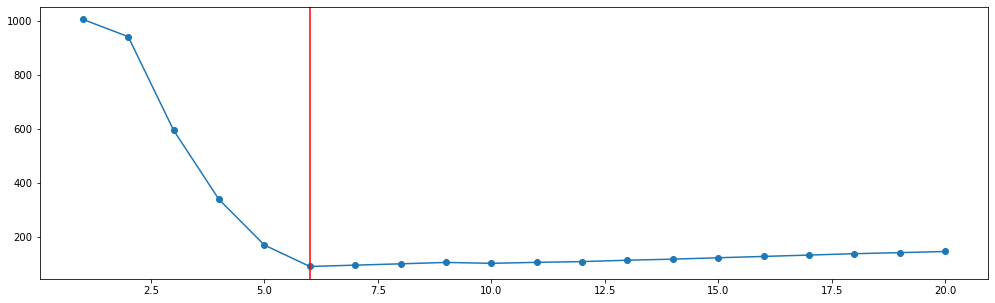

In [33]:
BIC = []
for i in range(1,21):
    poly = PolynomialFeatures(degree=i)
    x_trans = poly.fit_transform(x)

    plr = sm.OLS(y,x_trans).fit()
    y_pred_plr = plr.predict(x_trans)
    BIC.append(plr.bic)

print('Minimum value: {:.2f}'.format(min(BIC)))
print('Optimal No. of Degrees: ',BIC.index(min(BIC))+1)

plt.figure(figsize=(17,5))
plt.plot(range(1,21), BIC, marker='o')
plt.axvline(BIC.index(min(BIC))+1,color='red')
plt.show()

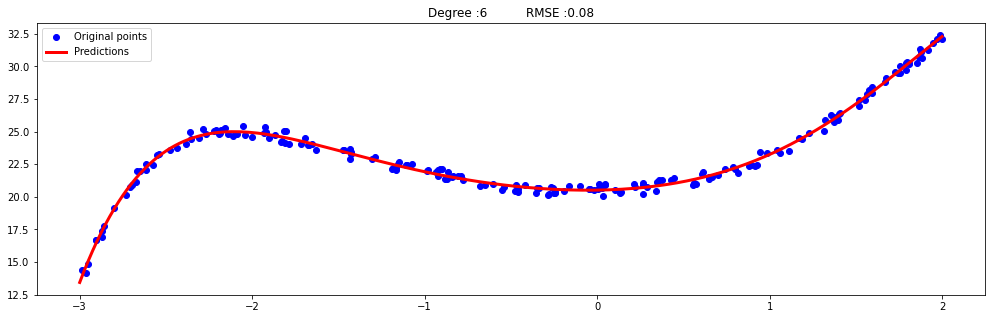

In [34]:
poly = PolynomialFeatures(degree=6)

x_trans = poly.fit_transform(x)

plr = LinearRegression()
plr.fit(x_trans,y)
y_pred_plr = plr.predict(x_trans)

#-----------Testing Plot-----------
X_new=np.linspace(-3, 2, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = plr.predict(X_new_poly)
#----------------------------------

plt.figure(figsize=(17,5))
plt.plot(x,y, 'bo', label='Original points')
plt.plot(X_new, y_new, "r", linewidth=3, label="Predictions")
plt.title('Degree :{}          RMSE :{:.2f}'.format(6,mean_squared_error(y,y_pred_plr), fontdict = {'fontsize' : 14}))
plt.legend()
plt.show()

In [37]:
print('coefficients : ', plr.coef_, end='\n\n')
print('intercept: ', plr.intercept_)

# Original Equation:
# y = (0.2 * x) +( 1.95 * x **2 )+ (0.5 * x **3) + (0.2 * x**4) - (0.025 * x**5) - \
# (0.045 * x**6) \

# Intercept: 
# + (20 + np.random.rand(200,1))
# 

coefficients :  [[ 0.          0.20218122  1.91939998  0.47613418  0.19462328 -0.01661853
  -0.04210587]]

intercept:  [20.50982075]
